In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 9)  # figure width and height
plt.rcParams["font.size"] = 20            # fontsize in plots

In [7]:
import numpy as np
import scipy
import pandas as pd
#import xarray as xr
import math

In [8]:
import corsika
import os.path

In [9]:
#fp = corsika.ShowerFile("showers/proton/DAT000001")
#fg = corsika.ShowerFile("showers/gamma/DAT000001")

fp = corsika.ShowerFile("showers/proton/DAT000002")
fg = corsika.ShowerFile("showers/gamma/DAT000002")


In [10]:
fg.n_events # number of showers in file

5

In [11]:
shower_idx = 2

In [12]:
shower = fg.shower(shower_idx)
shower.energy / 1000 # TeV

10.0

In [13]:
len(list(shower.particles))

31500

In [14]:
# count muons
len([p for p in shower.particles if p.corsika_code in [5, 6]])

2

In [15]:
# count em
len([p for p in shower.particles if p.corsika_code in [1, 2, 3]])

31498

In [16]:
np.rad2deg(shower.zenith)

0.0

In [17]:
parts = pd.DataFrame([[p.x/100, p.y/100, p.px, p.py, p.kinetic_energy, p.t_or_z, p.corsika_code, p.name] 
                      for p in shower.particles],
                      columns = ('x', 'y', 'px', 'py', 'E', 't', 'code', 'name'))

In [18]:
partsp = pd.DataFrame([[p.x/100, p.y/100, p.px, p.py, p.kinetic_energy, p.t_or_z, p.corsika_code, p.name] 
                       for p in fp.shower(shower_idx).particles],
                      columns = ('x', 'y', 'px', 'py', 'E', 't', 'code', 'name'))

In [19]:
parts['r'] = np.sqrt(parts.x**2 + parts.y**2)

In [20]:
parts[np.all((parts.r > 100, parts.t < 10), 0)]

,x,y,px,py,E,t,code,name,r
19,-55.763066,107.387197,-0.000375,0.000816,0.026043,5.458419,1,gamma,121.002189
20,-56.004058,109.653799,-0.000393,0.001038,0.026034,5.739669,1,gamma,123.127617
21,-54.625117,108.952246,-0.000954,0.003755,0.101637,5.599044,1,gamma,121.879019
22,-51.350527,112.714570,0.000252,0.002820,0.052369,6.145919,1,gamma,123.860611
23,-46.234805,102.782754,0.000118,-0.000008,0.004189,5.583419,1,gamma,112.702935
122,40.021323,-135.479062,0.000070,-0.000112,0.003174,6.528732,1,gamma,141.266708
140,-48.107412,-126.840371,-0.000080,-0.000233,0.009552,6.372482,1,gamma,135.656931
141,92.075879,-70.046064,0.000791,-0.002184,0.077876,5.513107,1,gamma,115.691048
142,-101.228672,62.722300,-0.000474,0.000380,0.017320,5.934982,1,gamma,119.085393
310,70.483276,111.126396,0.003297,0.003845,0.122426,6.099044,1,gamma,131.593952


In [21]:
rg = 300

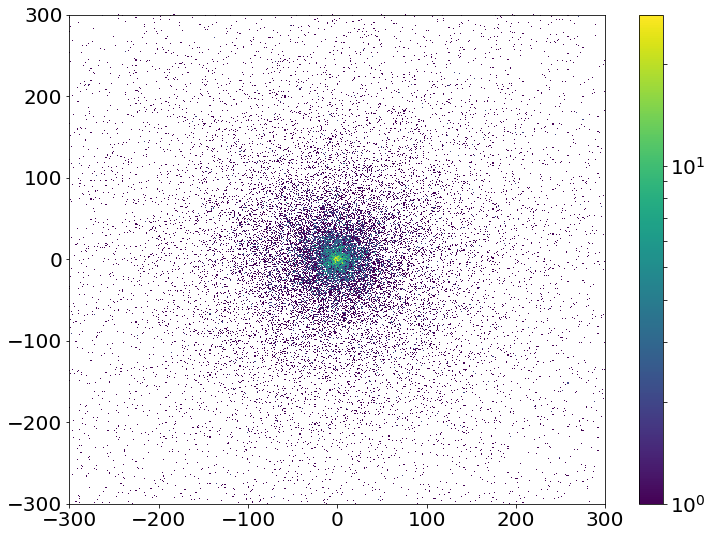

In [22]:
plt.hist2d(parts.x, parts.y, bins=500, norm=mcolors.LogNorm(), range=[[-rg, rg], [-rg, rg]])
plt.colorbar()
plt.show()
None

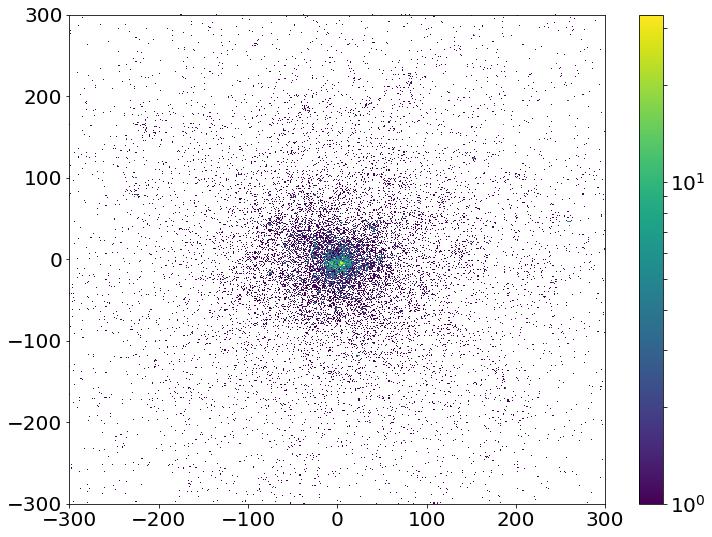

In [23]:
plt.hist2d(partsp.x, partsp.y, bins=500, norm=mcolors.LogNorm(), range=[[-rg, rg], [-rg, rg]])
plt.colorbar()
plt.show()
None